In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Cleaning categorical data

Let's read the file from the morning session.

In [5]:
data = pd.read_csv(r'.\files_for_lab\customer_value_analysis.csv')

In [6]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


We have spent some time during the morning to deal with the `INCOME` column. We will consider it as a **categorical ordinal** column

In [5]:
data['INCOME'].value_counts()

5    18321
4    17408
2    15586
3    13465
1     9304
6     9158
7     7327
Name: INCOME, dtype: int64

In [6]:
categoricals = data.select_dtypes([object])
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,NaN,XXXX,NaN,F,T2,NaN,NaN,L4E
1,CA,NaN,XXXX,NaN,M,S1,H,NaN,L2G
2,NC,NaN,XXXX,NaN,M,R2,U,NaN,L4E
3,CA,NaN,XXXX,NaN,F,R2,U,NaN,L4E
4,FL,NaN,XXXX,X,F,S2,H,NaN,L2F


# NA's in categorical columns.

In [7]:
data.isna().sum()

STATE           0
PVASTATE    89184
DOB             0
MDMAUD          0
RECP3       88736
GENDER       2795
DOMAIN       2176
INCOME          0
HOMEOWNR    21051
HV1             0
HV2             0
HV3             0
HV4             0
IC1             0
IC2             0
IC3             0
IC4             0
IC5             0
VETERANS    80723
NUMPROM         0
CARDPROM        0
CARDPM12        0
NUMPRM12        0
MAXADATE        0
RFA_2           0
NGIFTALL        0
TIMELAG      9653
AVGGIFT         0
dtype: int64

Without knowing how big is our dataset, we don't know is those numbers are big or not.

In [8]:
data.shape

(90569, 28)

Let's determine which percentage of data represents this amount of missing values of each categorical column.

In [9]:
categoricals.isna().sum()/categoricals.shape[0]

STATE       0.000000
PVASTATE    0.984708
MDMAUD      0.000000
RECP3       0.979761
GENDER      0.030860
DOMAIN      0.024026
HOMEOWNR    0.232431
VETERANS    0.891287
RFA_2       0.000000
dtype: float64

# Columns: PVASTATE, RECP3, and VETERANS

Let's see what are possible values of the categorical columns that have a really big percentage of missing values, alongise with their frequencies.

In [10]:
display(data['PVASTATE'].value_counts(dropna=False))
display(data['RECP3'].value_counts(dropna=False))
display(data['VETERANS'].value_counts(dropna=False))

NaN    89184
P       1380
E          5
Name: PVASTATE, dtype: int64

NaN    88736
X       1833
Name: RECP3, dtype: int64

NaN    80723
Y       9846
Name: VETERANS, dtype: int64

At this moment, we're going to replace their missing values with the flag "N".

In [11]:
data['PVASTATE'] = data['PVASTATE'].fillna('N')
data['RECP3'] = data['RECP3'].fillna('N')
data['VETERANS'] = data['VETERANS'].fillna('N')
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,N,3712,XXXX,N,F,T2,3,NaN,479,...,N,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,N,5202,XXXX,N,M,S1,6,H,5468,...,N,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,N,0,XXXX,N,M,R2,3,U,497,...,N,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,N,2801,XXXX,N,F,R2,1,U,1000,...,N,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,N,2001,XXXX,X,F,S2,3,H,576,...,N,113,43,10,25,9702,L2F,37,14.0,6.864865


# Activity:

Get the most frequent value for each column in the `categoricals` DataFrame with a single command.

In [12]:
# Your code here
categoricals.mode()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,CA,P,XXXX,X,F,R2,H,Y,L1F


# Column GENDER

Now, let's get the rows for which the GENDER has a missing value.

In [13]:
data[data['GENDER'].isnull()]

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
5,AL,N,0,XXXX,N,NaN,T2,5,NaN,807,...,N,35,15,6,12,9702,L1F,4,6.0,12.750000
21,FL,N,0,XXXX,N,NaN,T2,2,NaN,1153,...,N,15,8,2,4,9612,L1G,3,2.0,26.666667
39,MI,N,0,XXXX,N,NaN,U1,5,NaN,686,...,N,71,28,6,14,9702,L2E,11,6.0,9.818182
64,IL,N,2608,XXXX,N,NaN,R2,2,NaN,515,...,N,71,28,5,13,9702,L1E,15,6.0,6.833333
152,MI,N,0,XXXX,N,NaN,T2,2,NaN,317,...,N,41,17,6,13,9702,L3G,8,5.0,18.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90436,OR,N,3501,XXXX,N,NaN,S2,4,NaN,1199,...,N,10,4,3,8,9702,L1G,1,NaN,25.000000
90480,SC,N,0,XXXX,X,NaN,NaN,4,NaN,1000,...,N,66,22,11,26,9702,L2F,8,3.0,9.250000
90518,SC,N,0,XXXX,N,NaN,C3,4,NaN,370,...,N,66,27,5,12,9702,L1E,21,10.0,5.190476
90545,IL,N,0,XXXX,N,NaN,U3,3,NaN,660,...,N,28,11,4,9,9702,L1F,2,11.0,10.000000


In [14]:
data['GENDER'].value_counts(dropna=False)

F      48668
M      37132
NaN     2795
U       1635
J        336
C          2
A          1
Name: GENDER, dtype: int64

# Activity:

Fill out any value other than "F"/"M" on column gender with "U". Then, get the frequencies of  the new values "F", "M", and "U".

In [15]:
# Your code here
# np.where(condition, value_if_condition_True, value_if_condition_False)

In [16]:
data['GENDER'] = np.where(data['GENDER'].isin(["F","M"])==False,"U", data['GENDER'] )

# Column AVGGIFT

Let's see if the company had a gender bias in AVGGIFT. In other words, was the company giving bigger or smaller `AVGGIFT` to the donnors based on their gender?

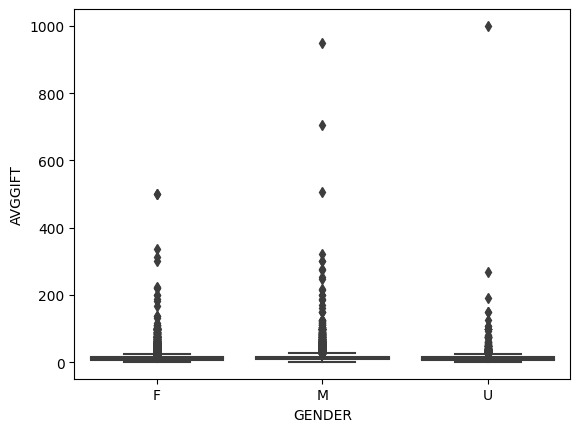

In [17]:
# Let's get a boxplot of AVGGIFT split by gender values
sns.boxplot(data=data, x="GENDER", y="AVGGIFT")
plt.show()

In the previous plot, it's hard to see differences (except for the outliers) becuase the distributions are heavilly spiked.. Let's get some number.

In [18]:
data.groupby("GENDER")["AVGGIFT"].median(), data.groupby("GENDER")["AVGGIFT"].quantile(0.75)

(GENDER
 F    11.461538
 M    12.000000
 U    11.263158
 Name: AVGGIFT, dtype: float64,
 GENDER
 F    15.0
 M    16.5
 U    15.0
 Name: AVGGIFT, dtype: float64)

As we can see, the male customers were granted with slightly bigger gifts amounts (excepting one outlier).

Now, let's compare the distributions of AVGGIFT by gender (discarding outliers: gifts > 400)

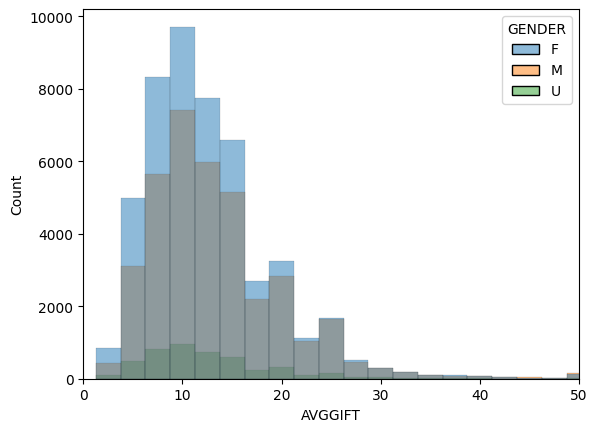

In [19]:
fig, ax = plt.subplots()
sns.histplot(data=data,x="AVGGIFT", hue="GENDER", bins=400, ax=ax)
ax.set_xlim(0,50) # Here we limit the values of the X axis to a maximum of 50.
plt.show()

The distributions are quite similar. The main difference is in the number of customers in every bin but most likely this is could be because of the gender imbalance (remember the output of `data['GENDER'].value_counts()`).

# Column STATE

In [20]:
# Dealing with states
count_states = data['STATE'].value_counts(dropna=False)
count_states

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

This is a categorical nominal column (there is no implicit order in the values) that can take too many values. If we use a OneHotEncoder to dummify the values we will end up adding a lot of columns in our dataframe. Therefore, is desirable to group the some states together to end with less columns after dummification. Of course, after doing it, the future model to predict AVGGIFT model will not be so specific.

In [21]:
# Checkout underrepressented states.
count_states[count_states < 2500]

TN    2396
AZ    2278
MN    2081
OR    2045
CO    1929
SC    1660
AL    1627
OK    1553
KY    1542
LA    1533
KS    1233
IA    1214
AR     969
MS     948
NV     923
NM     824
NE     715
UT     546
ID     504
MT     498
HI     423
SD     278
AK     275
WY     267
ND     241
AP      78
NY      70
VA      54
OH      52
PA      36
MD      30
MA      25
NJ      24
CT      20
AA      15
AE      14
ME      11
NH       8
RI       6
VT       6
VI       5
WV       3
GU       3
DE       3
AS       1
DC       1
Name: STATE, dtype: int64

Let's create a list of underrepresented states.

In [22]:
small_states = list(count_states[count_states < 2500].index)
small_states

['TN',
 'AZ',
 'MN',
 'OR',
 'CO',
 'SC',
 'AL',
 'OK',
 'KY',
 'LA',
 'KS',
 'IA',
 'AR',
 'MS',
 'NV',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'SD',
 'AK',
 'WY',
 'ND',
 'AP',
 'NY',
 'VA',
 'OH',
 'PA',
 'MD',
 'MA',
 'NJ',
 'CT',
 'AA',
 'AE',
 'ME',
 'NH',
 'RI',
 'VT',
 'VI',
 'WV',
 'GU',
 'DE',
 'AS',
 'DC']

We could group together the underrepresented states. However, this is not a good strategy on mid-long term because the amount of customers in each state will change overtime. Therefore, this will force us to run this command on an scheduled basis.

A more reasonable approach could be to group the states by regions as shown [here](https://www.infoplease.com/us/states/regions-of-the-us)

In [23]:
{"S": [1,2], "M": [2,4]}.items()

dict_items([('S', [1, 2]), ('M', [2, 4])])

In [24]:
# Groupping states in regions
def clean_state(state: str) -> str:
    '''
    This function determine to which region belongs a state

    Input:
    state: str

    Output:
    Region to which the state belongs. If the state is not found it returns "Other"
    '''

    states = {"new_england": ["CT","ME","MA","NH","RI","VT"],
              "middle_atlantic": ["DE","MD","NJ","NY","PA"],
              "south": ["AL","AR","FL","GA","KY","LA","MS","MO","NC","SC","TN","VA","WV"],
              "mid_west": ["IL","IN","IA","KS","MI","MN","NE","ND","OH","SD","WI"],
              "south_west": ["AZ","NM","OK","TX"],
              "west": ["AK","CA","CO","HI","ID","MT","NV","OR","UT","WA","WY"] }

    new_state = [ key for key, value in states.items() if state in value ]

    if ( len(new_state) != 0):
        return new_state[0]
    else:
        return "Other"


# Here our cleaning function contains two inputs. Therefore, we can't use .apply directly.
data['STATE'] = data['STATE'].apply(clean_state)
#data['STATE'] = list(map(clean_state, data['STATE']))
data.rename(columns={"STATE":"REGION"},inplace=True)


In [25]:
data['REGION'].value_counts(dropna=False)

south              28491
west               27077
mid_west           22824
south_west         11821
middle_atlantic      163
Other                117
new_england           76
Name: REGION, dtype: int64

Let's plot these frequencies

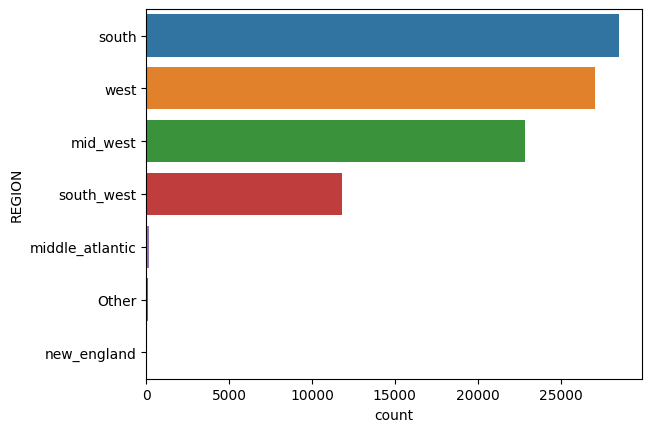

In [26]:
fig, ax = plt.subplots()
sns.countplot(data=data, y="REGION", order= data['REGION'].value_counts(dropna=False).index)
plt.show()

Clearly Middle_Atlantic, New_England and Other are underrepresented regions. It will be worth of doing some research on why:

* is the company too new in these regions, which could explain why the company have so few donnors there?

On the other hand:

* are the customers in these regions reluctant to donate?
* are the donors in these regions "big donnors", worth to keep putting effort in these regions?

These are some examples of very good business intelligence questions to answer for the company. We could check the distribution of donation amount per region. However, the distribution will be more accurate for the most populated regions rather than for the less populated, simply because our sample is bigger in those regions. Then, it could be more interesting to check the donation amount per customer in each region. One way could be to compute the average donation amount. However, remember that the mean is very sensitive to outliers. Therefore, it will be better to get the median amount. Unfortunatelly, we don't have this information in this dataset.


# Column MDMAUD

In [27]:
# Now let's checkout MDMAUD
data['MDMAUD'].value_counts(dropna=False)

XXXX    90290
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

Again the values of this columns are heavilly unbalanced, as most of the values are underrepresented. We need to fix this.

# Activity:

Consider the column MDMAUD. Use a user defined function to reduce the number of categories to two:

* XXXX
* other

In [28]:
# Your code here
def replace_mdmaud_values(value: str) -> str:
    if ( value == "XXXX" ):
        return value
    else:
        return "Other"

data['MDMAUD'] = data['MDMAUD'].apply(replace_mdmaud_values)

In [29]:
data['MDMAUD'].unique()

array(['XXXX', 'Other'], dtype=object)

# Column IC2

This column is numerical.

In [30]:
# Now IC2
data['IC2'].value_counts()

0       892
288     439
313     376
263     364
315     358
       ... 
1359      1
1245      1
1130      1
1457      1
1345      1
Name: IC2, Length: 1210, dtype: int64

<Axes: >

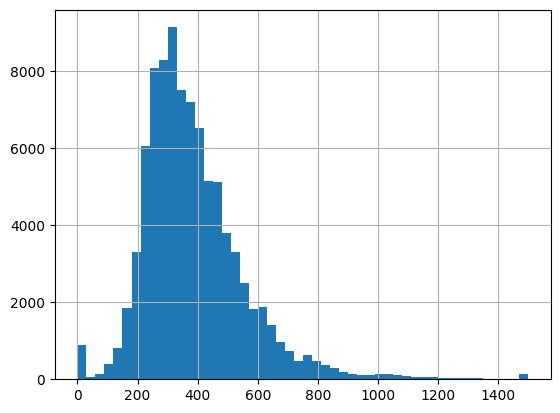

In [31]:
data['IC2'].hist(bins=50)

Let's say that we want try to cast it as categorical creating bins.
There are multiple ways to bin numerical columns:

* equally spaced bins
* based on frequency
* custom

## Binning numerical columns: Equally spaced bins

Pandas has an very usefull function to bin numerical columns: [pd.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Let's see some examples.

In [32]:
# Let's try first with four equally spaced bins
# We first set, the labels of each bins. This is optional but hhigly recommended.
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']

# We wil create a new column with te binning before replacing the original just in case.
data['ic2_category'] = pd.cut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category']].head(10)

,IC2,ic2_category
0,318,Low
1,1096,High
2,292,Low
3,388,Moderate
4,250,Low
5,410,Moderate
6,284,Low
7,457,Moderate
8,266,Low
9,329,Low


What happens with the frequencies of each possible value in the new column?

In [33]:
data['ic2_category'].value_counts(dropna=True)

Low          50651
Moderate     36648
High          2766
Very High      504
Name: ic2_category, dtype: int64

## Binning numerical columns: Equal frequencies

Bad job!!! Class imbalance! Now let's create bins of equal frequencies.

If we want to create bins having almost the same amount of samples int each, we can use the [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html?highlight=pandas%20qcut#pandas.qcut) which uses the columns quantiles to bin the values.

In [34]:
# We set the bin labels.
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_quartiles'] = pd.qcut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category_quartiles']].head(10)

,IC2,ic2_category_quartiles
0,318,Moderate
1,1096,Very High
2,292,Moderate
3,388,High
4,250,Low
5,410,High
6,284,Moderate
7,457,High
8,266,Low
9,329,Moderate


In [35]:
data['ic2_category_quartiles'].value_counts(dropna=False)

Low          22745
Moderate     22718
Very High    22594
High         22512
Name: ic2_category_quartiles, dtype: int64

Nicer!!! The reason why the bins are not perfectly equally sized is because `qcut()` is 13 is trying to compensate for repeating values.

## Binning numerical columns: Setting our own bins

We can also set our own bins width using the `pd.cut()` function. In this case, we will have to provide a Python list with the boundary values. Therefore, the amount of values must be one more than the number of desired bins.

In [36]:
# Another approach
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_userdef'] = pd.cut(data['IC2'],[0,300,500,1000,10000],labels=ic2_labels)
data[['IC2','ic2_category_userdef']].head(10)

,IC2,ic2_category_userdef
0,318,Moderate
1,1096,Very High
2,292,Low
3,388,Moderate
4,250,Low
5,410,Moderate
6,284,Low
7,457,Moderate
8,266,Low
9,329,Moderate


In [37]:
data['ic2_category_userdef'].value_counts()

Moderate     42839
Low          29197
High         16688
Very High      953
Name: ic2_category_userdef, dtype: int64

Not so good

# Column AVGGIFT

Now let's see if there are differences in the AVGGIFT for different values of `ic2_category`.

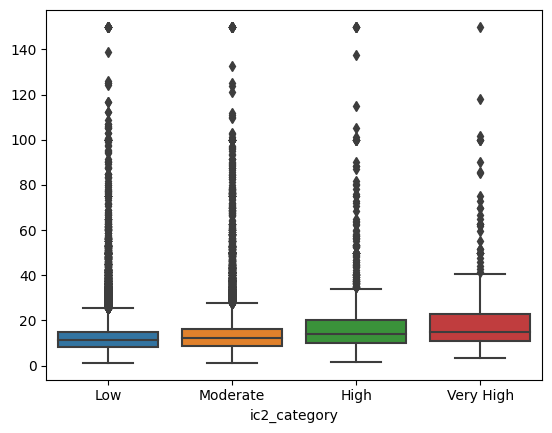

In [38]:
sns.boxplot(data=data, x="ic2_category", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT))
plt.show()

It seems that there are no significant differences. However, a proper analysis will involves using statistical tests.

Let's do the same but considering ic2_category_quartiles.

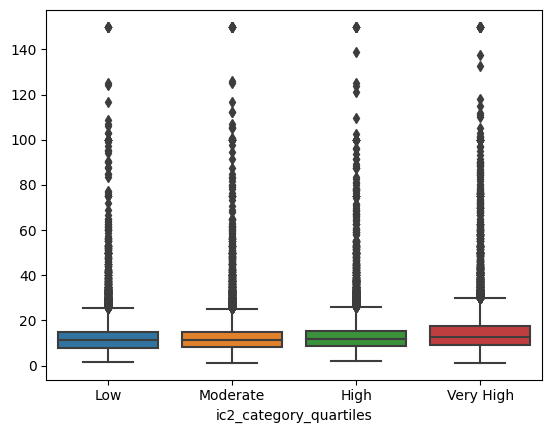

In [40]:
sns.boxplot(x="ic2_category_quartiles", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

According to the previous plot there are no significant differences.

Now let's see if we can find differences splitting by ic2_category_userdef.

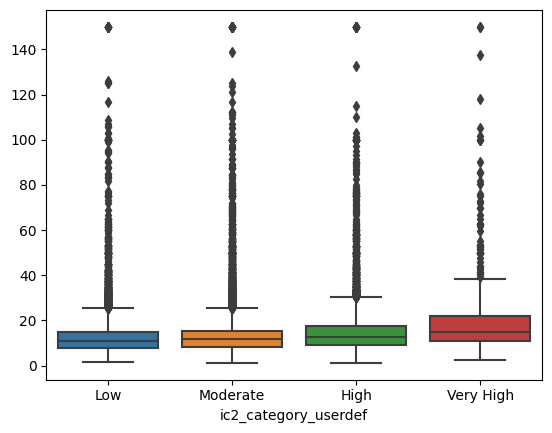

In [41]:
sns.boxplot(x="ic2_category_userdef", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

Apparently no significant differences, but to be sure, we must to a proper statistical analysis.